In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# descending order the date
recent_months = session.query(Measurement.date).order_by(Measurement.date.desc())
for month in recent_months:
    print (month)

('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-22',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-21',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-20',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-19',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-18',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-17',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-16',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-15',)
('2010-06-14',)
('2010-06-14',)
('2010-0

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

                # convert the string type date into int so we can calculate the gap between
one_year_ago = dt.datetime.strptime(recent_months.first().date, '%Y-%m-%d') - dt.timedelta(days=365)
# or: one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
last_12_months = pd.read_sql("SELECT date, prcp\
                            FROM measurement\
                            WHERE date >= '2016-08-23'", engine.connect())
last_12_months

# # or
# last_12_months = session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date >= one_year_ago).\
#     order_by(Measurement.date).all()
# last_12_months

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_last_12_months = last_12_months.set_index('date')
df_last_12_months

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


[]

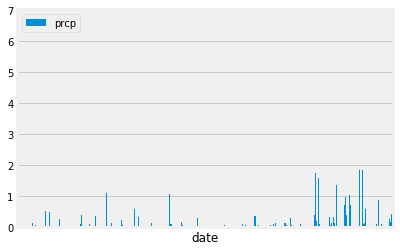

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1,ax1 = plt.subplots()
df_last_12_months.plot(kind='bar',ax=ax1)
# remove the xticks text for better presentation
ax1.get_xaxis().set_ticks([])

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last_12_months.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.prcp)). \
                    group_by(Measurement.station). \
                    order_by(func.count(Measurement.prcp).desc())
active_stations.all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs))
lowest_temp.all()

[('USC00511918', 53.0)]

In [20]:
# highest temperature recorded
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs))
highest_temp.all()

[('USC00519397', 87.0)]

In [21]:
#Average temperature of the most active station
avg_for_most_active= session.query(Measurement.station,func.avg(Measurement.tobs)).\
                        filter(Measurement.station == active_stations[0][0]).all()
avg_for_most_active

# # or
# avg_for_most_active = session.query(Measurement.station, func.avg(Measurement.tobs)). \
#                     group_by(Measurement.station). \
#                     order_by(func.count(Measurement.tobs).desc()).first()
# avg_for_most_active

[('USC00519281', 71.66378066378067)]

In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
history_for_highest_temp = session.query(Measurement.station, Measurement.tobs).\
                        filter(Measurement.station == active_stations[0][0], \
                               Measurement.date >= one_year_ago).\
                        order_by(Measurement.date.asc())
# show the top 5 results
history_for_highest_temp.limit(5).all()

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0)]

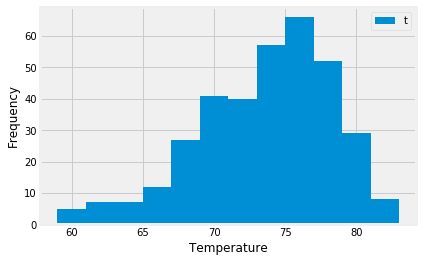

In [47]:
# plot the results as a histogram
fig2,ax2=plt.subplots()
# extract the tobs data from the list "history_for_highest_temp"
temps = [row[1] for row in history_for_highest_temp]
# plot the histogram and set label
ax2.hist(temps, bins=12)
ax2.set(xlabel='Temperature',ylabel='Frequency')
ax2.legend(labels='tobs')

![precipitation](Images/station-histogram.png)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_start_date = '2015-09-01'
my_end_date = '2015-09-15'
my_trip = calc_temps(my_start_date, my_end_date)
my_trip

[(73.0, 78.44329896907216, 85.0)]

[Text(0, 0.5, 'Temperature'), Text(0.5, 1.0, 'Trip Avg Temp')]

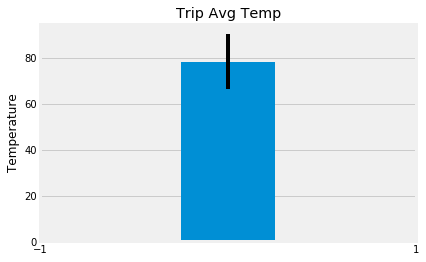

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# set up the value
min_temp = my_trip[0][0]
avg_temp = my_trip[0][1]
max_temp = my_trip[0][2]

# plot the bar chart
fig3,ax3=plt.subplots()
ax3.bar(x=0, height=avg_temp, yerr=max_temp-min_temp, width=0.5)
# formating
ax3.set_xticks([-1,1])
ax3.set(title='Trip Avg Temp', ylabel='Temperature')

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_my_trip = session.query(Measurement.station, func.sum(Measurement.prcp),\
                                 Station.name, Station.latitude,\
                                 Station.longitude, Station.elevation).\
                    filter(Measurement.date >= my_start_date,\
                           Measurement.date <= my_end_date).\
                    group_by(Measurement.station).\
                    order_by(func.sum(Measurement.prcp).desc())

rainfall_my_trip.limit(5).all()

[('USC00516128',
  135.98999999999995,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519281',
  86.75999999999998,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00513117',
  65.25000000000004,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519523',
  62.28000000000006,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519397',
  29.789999999999996,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0)]

## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# create a function to list all the dates for my trip
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [30]:
# convert the start and end date into int in order to use the "daterange" function        
my_start_date_int = dt.datetime.strptime(my_start_date, '%Y-%m-%d')
my_end_date_int = dt.datetime.strptime(my_end_date, '%Y-%m-%d')

my_end_date_int

datetime.datetime(2015, 9, 15, 0, 0)

In [31]:
# Stip off the year and save a list of %m-%d strings
# use the "daterange" function to creat a list of dates
                # only select the mm-dd in order to use the "daily_normals" function
my_dates_list = [str(date.strftime("%Y-%m-%d"))[5:10] for date in daterange(my_start_date_int, my_end_date_int)]
my_dates_list

['09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-05',
 '09-06',
 '09-07',
 '09-08',
 '09-09',
 '09-10',
 '09-11',
 '09-12',
 '09-13',
 '09-14',
 '09-15']

In [32]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = [daily_normals(i) for i in my_dates_list]
normals

[[(69.0, 77.0, 82.0)],
 [(67.0, 76.66666666666667, 83.0)],
 [(69.0, 76.13725490196079, 83.0)],
 [(68.0, 76.27083333333333, 84.0)],
 [(66.0, 75.91489361702128, 84.0)],
 [(66.0, 74.91111111111111, 81.0)],
 [(64.0, 75.18, 82.0)],
 [(66.0, 76.22222222222223, 83.0)],
 [(68.0, 76.36538461538461, 84.0)],
 [(67.0, 76.61224489795919, 85.0)],
 [(70.0, 76.69565217391305, 83.0)],
 [(68.0, 75.89795918367346, 85.0)],
 [(68.0, 75.875, 82.0)],
 [(69.0, 75.98076923076923, 85.0)],
 [(67.0, 76.14, 81.0)]]

In [33]:
# extract min, avg, max temp from the list
min_normals = [i[0][0] for i in normals]
avg_normals = [i[0][1] for i in normals]
max_normals = [i[0][2] for i in normals]

max_normals

[82.0,
 83.0,
 83.0,
 84.0,
 84.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 83.0,
 85.0,
 82.0,
 85.0,
 81.0]

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_my_trip_normals = pd.DataFrame(zip(min_normals,avg_normals,max_normals), index=my_dates_list,\
                                  columns=['min_temps','avg_temps','max_temps'])
df_my_trip_normals

,min_temps,avg_temps,max_temps
09-01,69.0,77.000000,82.0
09-02,67.0,76.666667,83.0
09-03,69.0,76.137255,83.0
09-04,68.0,76.270833,84.0
09-05,66.0,75.914894,84.0
09-06,66.0,74.911111,81.0
09-07,64.0,75.180000,82.0
09-08,66.0,76.222222,83.0
09-09,68.0,76.365385,84.0
09-10,67.0,76.612245,85.0


[Text(0, 0.5, 'Temperature'), Text(0.5, 0, 'Date')]

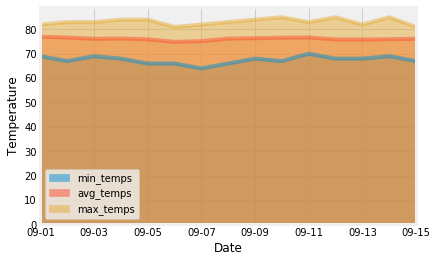

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
fig4,ax4=plt.subplots()
df_my_trip_normals.plot.area(stacked=False, ax=ax4)
# formating
ax4.set(xlabel='Date', ylabel='Temperature')